<a href="https://colab.research.google.com/github/AaryanRankhamb/Codsoft/blob/main/Genre_Classification(Task%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd

In [2]:
train_path = "/content/train_data.txt"
test_path = "/content/test_data.txt"

In [3]:
train_df = pd.read_csv(train_path, sep=":::", names=["Id", "Title", "Genre", "Description"], on_bad_lines="skip")

<ipython-input-3-3c2d121a25ec>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv(train_path, sep=":::", names=["Id", "Title", "Genre", "Description"], on_bad_lines="skip")


In [4]:
train_df

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:
train_df.drop(["Id", "Title"], axis=1, inplace=True)

In [6]:
train_df

,Genre,Description
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...
...,...,...
54209,comedy,This short-lived NBC live sitcom centered on ...
54210,horror,The NEXT Generation of EXPLOITATION. The sist...
54211,documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,comedy,Walter and Vivian live in the country and hav...


In [7]:
train_df["Genre"].nunique()

27

In [8]:
labels = list(train_df["Genre"].unique())
map_dic = {labels[i]:i for i in range(len(labels))}
map_dic

train_df["Labels"] = train_df["Genre"].map(map_dic)

In [9]:
print(map_dic)
train_df

{' drama ': 0, ' thriller ': 1, ' adult ': 2, ' documentary ': 3, ' comedy ': 4, ' crime ': 5, ' reality-tv ': 6, ' horror ': 7, ' sport ': 8, ' animation ': 9, ' action ': 10, ' fantasy ': 11, ' short ': 12, ' sci-fi ': 13, ' music ': 14, ' adventure ': 15, ' talk-show ': 16, ' western ': 17, ' family ': 18, ' mystery ': 19, ' history ': 20, ' news ': 21, ' biography ': 22, ' romance ': 23, ' game-show ': 24, ' musical ': 25, ' war ': 26}


,Genre,Description,Labels
0,drama,Listening in to a conversation between his do...,0
1,thriller,A brother and sister with a past incestuous r...,1
2,adult,As the bus empties the students for their fie...,2
3,drama,To help their unemployed father make ends mee...,0
4,drama,The film's title refers not only to the un-re...,0
...,...,...,...
54209,comedy,This short-lived NBC live sitcom centered on ...,4
54210,horror,The NEXT Generation of EXPLOITATION. The sist...,7
54211,documentary,"Ze bestaan echt, is a stand-up comedy about g...",3
54212,comedy,Walter and Vivian live in the country and hav...,4


In [10]:
train_df_fin = train_df.drop("Genre", axis=1)

In [11]:
train_df_fin

,Description,Labels
0,Listening in to a conversation between his do...,0
1,A brother and sister with a past incestuous r...,1
2,As the bus empties the students for their fie...,2
3,To help their unemployed father make ends mee...,0
4,The film's title refers not only to the un-re...,0
...,...,...
54209,This short-lived NBC live sitcom centered on ...,4
54210,The NEXT Generation of EXPLOITATION. The sist...,7
54211,"Ze bestaan echt, is a stand-up comedy about g...",3
54212,Walter and Vivian live in the country and hav...,4


<Axes: >

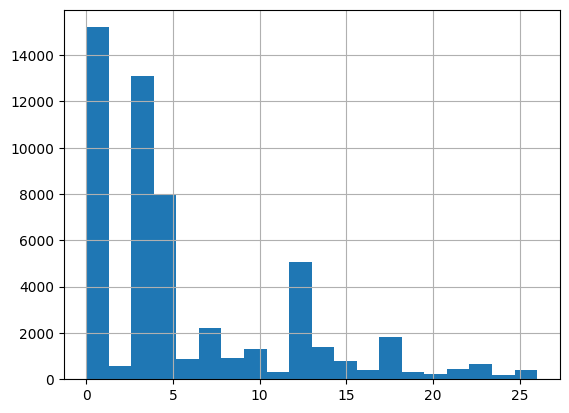

In [12]:
train_df_fin["Labels"].hist(bins=20)

In [13]:
train_df_fin

,Description,Labels
0,Listening in to a conversation between his do...,0
1,A brother and sister with a past incestuous r...,1
2,As the bus empties the students for their fie...,2
3,To help their unemployed father make ends mee...,0
4,The film's title refers not only to the un-re...,0
...,...,...
54209,This short-lived NBC live sitcom centered on ...,4
54210,The NEXT Generation of EXPLOITATION. The sist...,7
54211,"Ze bestaan echt, is a stand-up comedy about g...",3
54212,Walter and Vivian live in the country and hav...,4


In [14]:
!pip install -U spacy


In [15]:
!python -m spacy download en_core_web_lg


2024-01-09 10:33:32.484848: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 10:33:32.484915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 10:33:32.486928: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 10:33:32.498434: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 10:33:33.968578: W tensorflow/compiler/tf2

In [16]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [17]:
train_df_fin["Enc"] = train_df_fin["Description"].apply(lambda x: nlp(x).vector)

In [18]:
train_df_fin

,Description,Labels,Enc
0,Listening in to a conversation between his do...,0,"[-1.4410256, 1.5658828, -2.439357, -0.36297062..."
1,A brother and sister with a past incestuous r...,1,"[-2.1076772, 1.6972041, -3.0103295, -0.3133992..."
2,As the bus empties the students for their fie...,2,"[-1.8074012, 1.0276498, -1.0675164, -0.5026219..."
3,To help their unemployed father make ends mee...,0,"[-1.2247992, 0.5359791, -1.933631, -0.48268747..."
4,The film's title refers not only to the un-re...,0,"[-2.8977382, 0.16504495, -1.6407812, 0.6260537..."
...,...,...,...
54209,This short-lived NBC live sitcom centered on ...,4,"[-1.9624685, 0.91554546, -1.2400386, -0.185371..."
54210,The NEXT Generation of EXPLOITATION. The sist...,7,"[-1.8334194, 0.7616558, -1.6773113, 0.16535729..."
54211,"Ze bestaan echt, is a stand-up comedy about g...",3,"[-1.1071532, 1.2257272, -2.450252, 0.23210523,..."
54212,Walter and Vivian live in the country and hav...,4,"[-1.3301228, 1.7426894, -2.853383, -0.7009488,..."


In [19]:
train = train_df_fin.drop("Description", axis=1)

In [20]:
train

,Labels,Enc
0,0,"[-1.4410256, 1.5658828, -2.439357, -0.36297062..."
1,1,"[-2.1076772, 1.6972041, -3.0103295, -0.3133992..."
2,2,"[-1.8074012, 1.0276498, -1.0675164, -0.5026219..."
3,0,"[-1.2247992, 0.5359791, -1.933631, -0.48268747..."
4,0,"[-2.8977382, 0.16504495, -1.6407812, 0.6260537..."
...,...,...
54209,4,"[-1.9624685, 0.91554546, -1.2400386, -0.185371..."
54210,7,"[-1.8334194, 0.7616558, -1.6773113, 0.16535729..."
54211,3,"[-1.1071532, 1.2257272, -2.450252, 0.23210523,..."
54212,4,"[-1.3301228, 1.7426894, -2.853383, -0.7009488,..."


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train.Enc,
    train.Labels,
    test_size=0.2,
    random_state=42,
    shuffle=True,
    stratify =train.Labels
)

In [29]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
scaler  = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train_2d)
scaled_test = scaler.transform(X_test_2d)

In [31]:
clf = MultinomialNB()
clf.fit(scaled_train, y_train)

MultinomialNB()

In [32]:
y_pred = clf.predict(scaled_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.78      0.49      2723
           1       0.00      0.00      0.00       318
           2       0.00      0.00      0.00       118
           3       0.44      0.80      0.57      2619
           4       0.33      0.03      0.05      1490
           5       0.00      0.00      0.00       101
           6       0.00      0.00      0.00       177
           7       0.00      0.00      0.00       441
           8       0.58      0.08      0.14        86
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00       263
          11       0.00      0.00      0.00        65
          12       0.00      0.00      0.00      1015
          13       0.00      0.00      0.00       129
          14       0.26      0.08      0.12       146
          15       0.00      0.00      0.00       155
          16       0.00      0.00      0.00        78
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
! pip install imblearn
from imblearn.ensemble import BalancedRandomForestClassifier

model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)


In [35]:
model.fit(scaled_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning: `sklearn.utils.para

BalancedRandomForestClassifier(random_state=42)

In [39]:
y_pred2 = clf2.predict(scaled_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.43      0.74      0.55      2723
           1       0.00      0.00      0.00       318
           2       1.00      0.01      0.02       118
           3       0.50      0.85      0.63      2619
           4       0.37      0.32      0.34      1490
           5       0.00      0.00      0.00       101
           6       0.50      0.01      0.01       177
           7       0.68      0.04      0.07       441
           8       0.65      0.13      0.21        86
           9       0.00      0.00      0.00       100
          10       1.00      0.02      0.03       263
          11       0.00      0.00      0.00        65
          12       0.42      0.07      0.12      1015
          13       0.00      0.00      0.00       129
          14       0.60      0.12      0.20       146
          15       0.00      0.00      0.00       155
          16       1.00      0.01      0.03        78
          17       0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
